<a href="https://colab.research.google.com/github/kainight0/HWProj/blob/main/WordFrequencyBarChartandWord_Cloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Download Data**

In [39]:
import nltk

nltk.download('stopwords')

nltk.download('wordnet')

nltk.download('punkt_tab')
!pip install requests

import requests

target_url ='http://www.gutenberg.org/files/2265/2265.txt'

response = requests.get(target_url)

data = response.text


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


**Load Data**

In [40]:
%matplotlib inline
from pathlib import Path
from textblob import TextBlob

blob = TextBlob(data)

In [41]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

items = blob.word_counts.items()
items = [item for item in items if item[0] not in stop_words]

**Get Top 20 words**

In [42]:
from operator import itemgetter

sorted_items = sorted(items, key=itemgetter(1), reverse=True)
top20 = sorted_items[0:20]

**Bar chart**

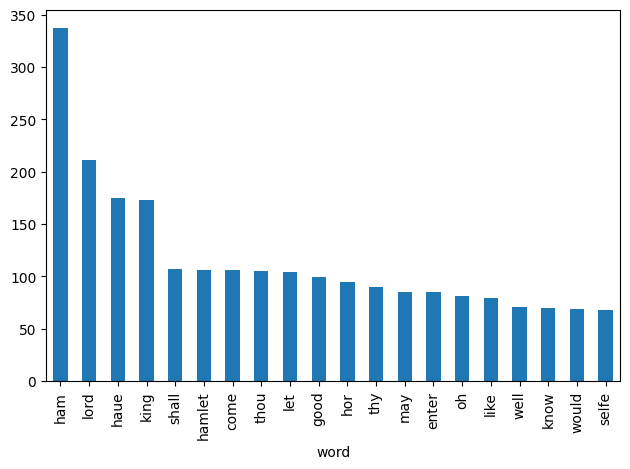

In [43]:
import pandas as pd
df = pd.DataFrame(top20, columns=['word', 'count'])
df

axes = df.plot.bar(x='word', y='count', legend=False)

import matplotlib.pyplot as plt
plt.gcf().tight_layout()

**WordCloud**

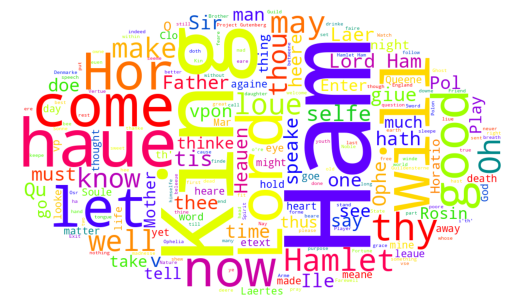

In [44]:
import imageio
from wordcloud import WordCloud

image_file="https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"

mask_image =imageio.v3.imread(image_file)

wordcloud = WordCloud(width=1000, height=1000,
    colormap='prism', mask=mask_image, background_color='white')

wordcloud = wordcloud.generate(data)

plt.axis('off')
plt.imshow(wordcloud)